<a href="https://colab.research.google.com/github/RaoMasood1/Heart-Disease_Prediction_with_pre_processing/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [407]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report


In [408]:
import pandas as pd # Data Processing
import numpy as np
df= pd.read_csv('/content/Heart-Disease_Prediction.csv')

In [409]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [410]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [411]:
type(df)

pandas.core.frame.DataFrame

In [412]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [413]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [415]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [416]:
df.shape

(303, 14)

In [417]:
df.ndim

2

In [418]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [419]:
df["target"].nunique()

2

In [420]:
df.target.nunique()

2

In [421]:
df.target.unique()

array([1, 0])

In [422]:
df["target"].unique()

array([1, 0])

In [423]:
df["sex"].unique()

array([1, 0])

In [424]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [425]:
df.target.value_counts(True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [426]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [427]:
df["target"].sample(20)

146    1
173    0
18     1
263    0
238    0
254    0
125    1
174    0
283    0
273    0
73     1
135    1
124    1
80     1
1      1
136    1
83     1
71     1
187    0
159    1
Name: target, dtype: int64

In [428]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Heart Disease Prediction')

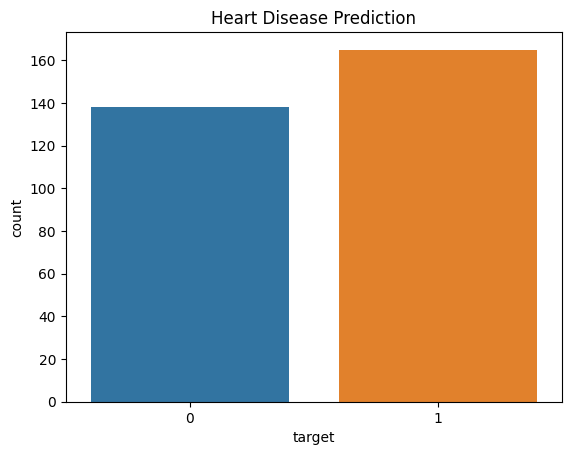

In [429]:
# Show Number of Patient by Stroke
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df , x='target')
plt.title('Heart Disease Prediction')

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [431]:
df.sample(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0


In [432]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [433]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [434]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [435]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [436]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [437]:
print('Missing data sum :')
print(df.isnull().sum())

print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)

Missing data sum :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing data percentage (%):
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [438]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [439]:
cd = pd.DataFrame(cat_features)
cd.head()

""


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [441]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [443]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [444]:
print('*'*10)

**********


In [445]:
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [446]:
cat_features

[]

In [447]:
df.sex.duplicated()

0      False
1       True
2      False
3       True
4       True
       ...  
298     True
299     True
300     True
301     True
302     True
Name: sex, Length: 303, dtype: bool

In [448]:
df.duplicated().sum()

1

In [449]:
df['sex'].unique()

array([1, 0])

In [450]:
df['sex'].nunique()

2

In [451]:
df['age'].nunique()

41

In [452]:
df['age'].sample(10)

243    57
56     48
260    66
14     58
91     57
235    51
221    55
208    49
231    57
123    54
Name: age, dtype: int64

In [453]:
df['cp'].unique()

array([3, 2, 1, 0])

In [454]:
df['cp'].nunique()

4

In [455]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [456]:
df['trestbps'].nunique()

49

In [457]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [458]:
df['chol'].nunique()

152

In [459]:
df['fbs'].unique()

array([1, 0])

In [460]:
df['fbs'].nunique()

2

In [461]:
df['restecg'].unique()

array([0, 1, 2])

In [462]:
df['restecg'].nunique()

3

In [463]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [464]:
df['thalach'].nunique()

91

In [465]:
df['exang'].unique()

array([0, 1])

In [466]:
df['exang'].nunique()

2

In [467]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [468]:
df['oldpeak'].nunique()

40

In [469]:
df['slope'].unique()

array([0, 2, 1])

In [470]:
df['slope'].nunique()

3

In [471]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [472]:
df['ca'].nunique()

5

In [473]:
df['thal'].unique()

array([1, 2, 3, 0])

In [474]:
df['thal'].nunique()

4

[Text(0.5, 1.0, 'Correlation Matrix')]

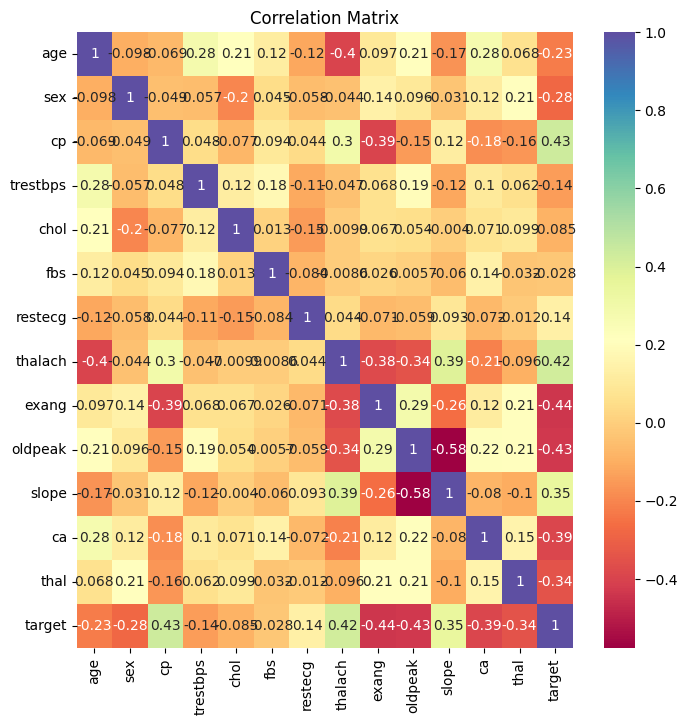

In [475]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<Axes: >

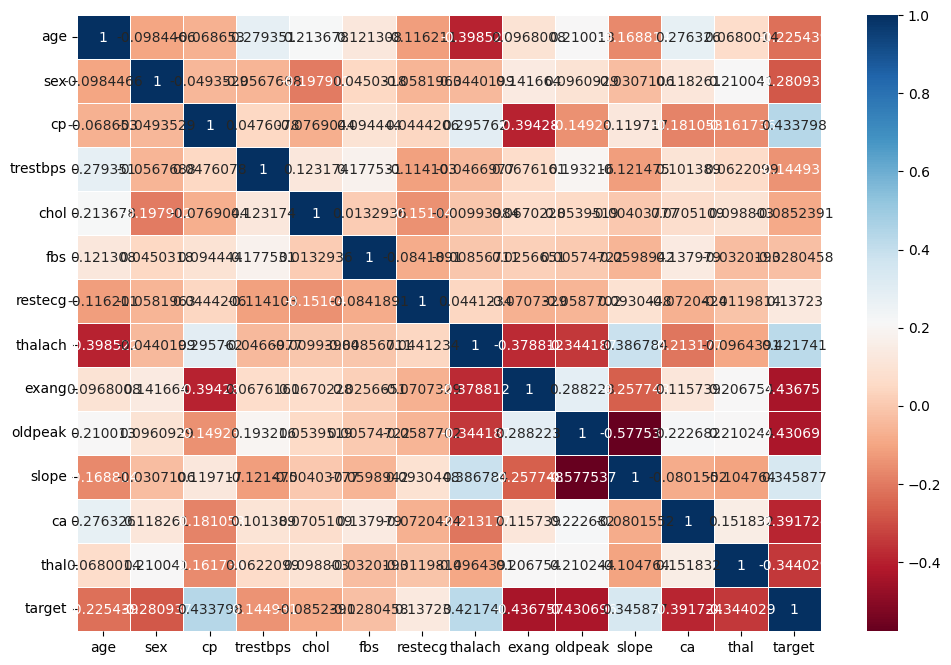

In [476]:
fig = plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")


In [477]:
corr_matrix = df.corr().round(2)
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


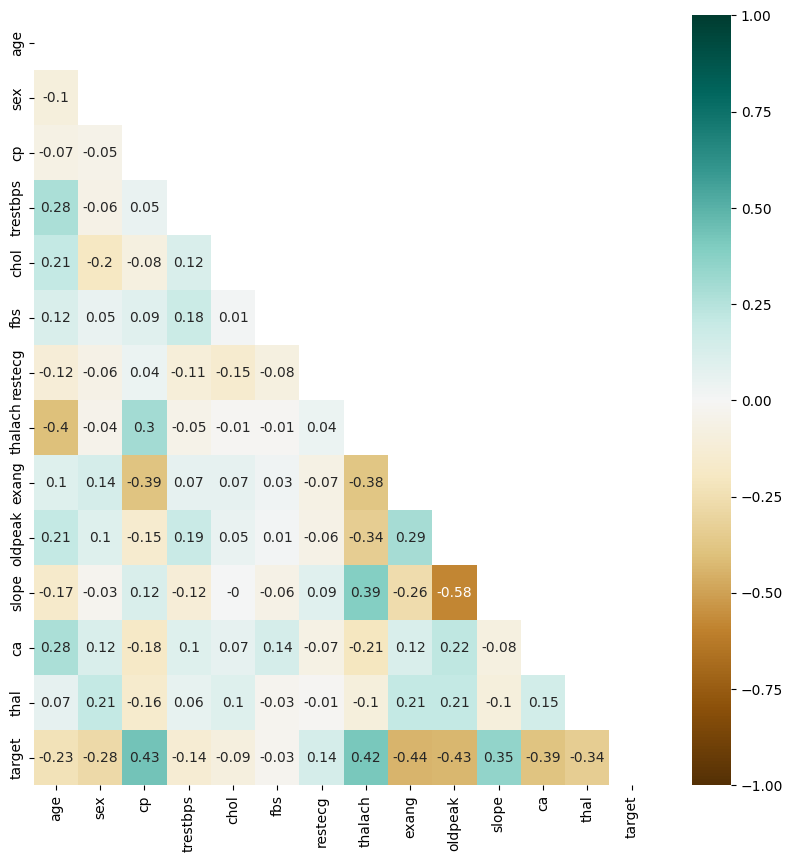

In [478]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [479]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [480]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  14
********************************************************************************
Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [481]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='target',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

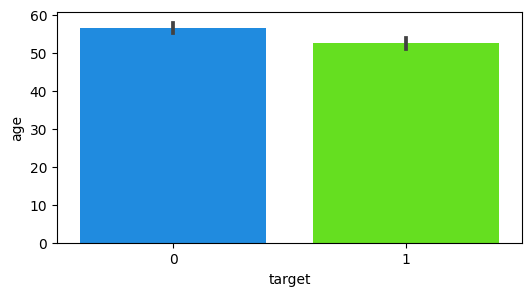

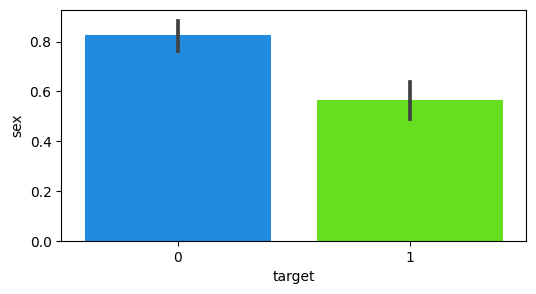

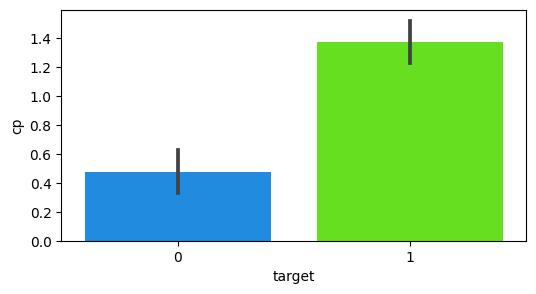

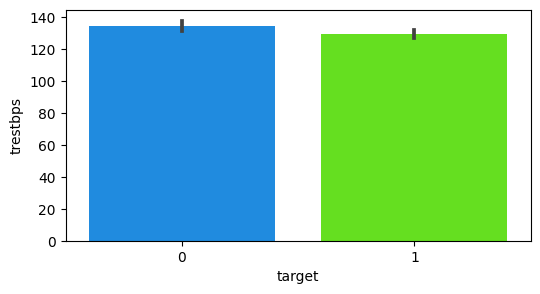

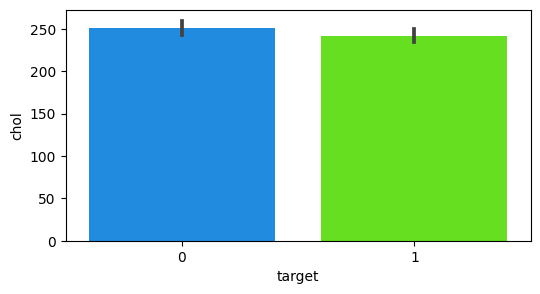

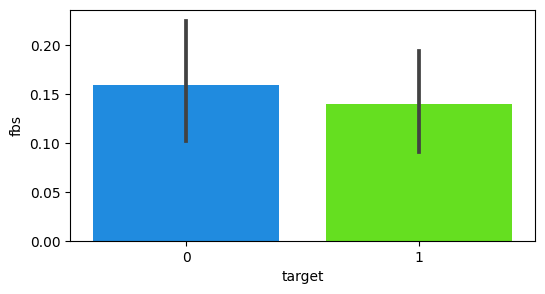

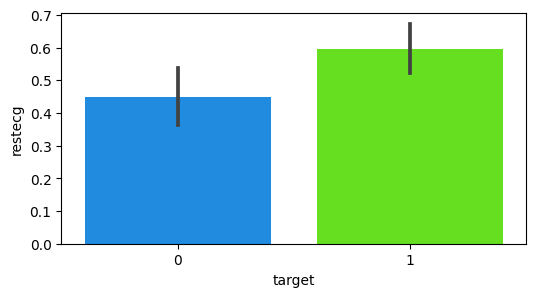

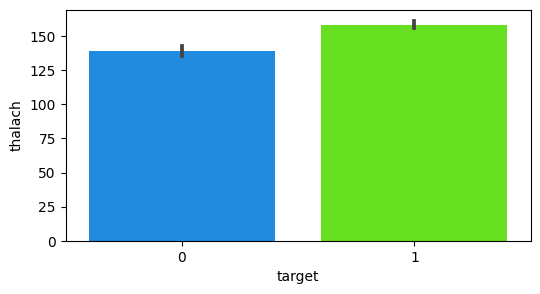

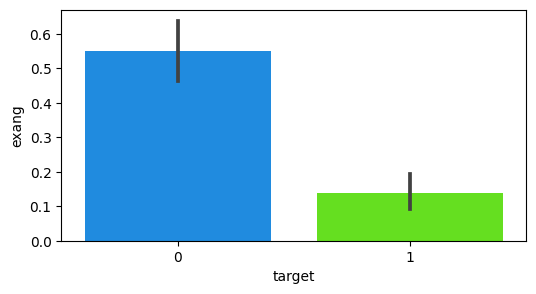

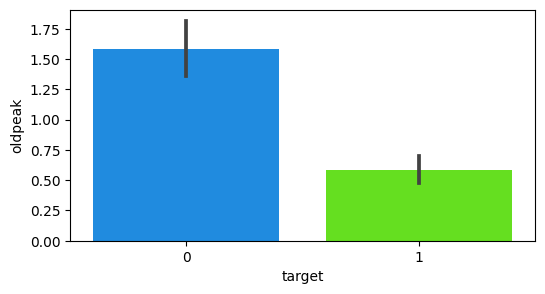

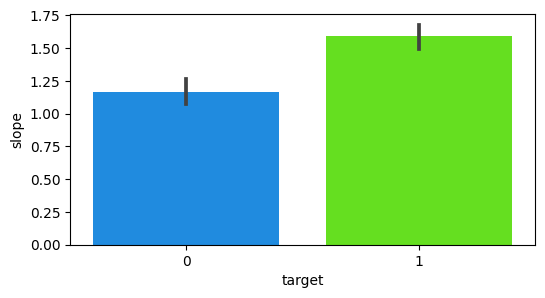

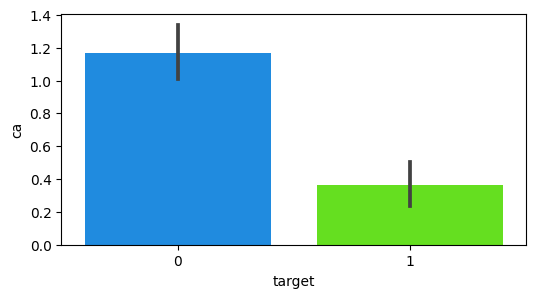

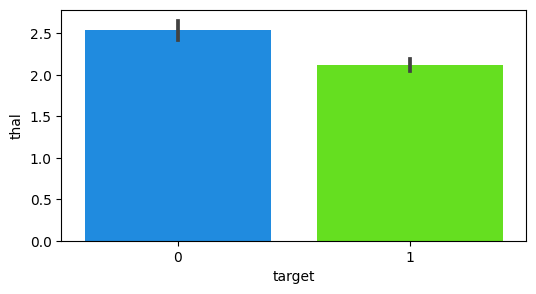

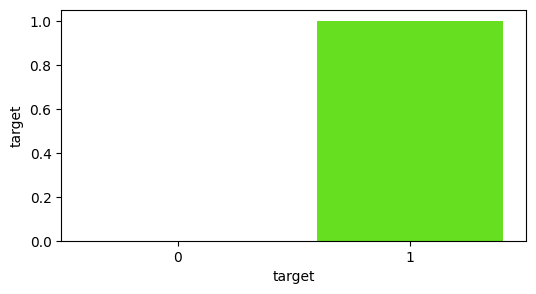

In [482]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='target',y=col,palette='gist_rainbow_r')

In [483]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [484]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [485]:
df["trestbps"]=df["trestbps"].fillna(df["trestbps"].mean())

In [486]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [487]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [488]:
df.shape

(303, 14)

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [490]:
train_data_cat = df.select_dtypes("object")
train_data_num = df.select_dtypes("number")

In [491]:
train_data_cat.head(3)

""
0
1
2


In [492]:
train_data_num.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [493]:
print(train_data_cat)
print(train_data_cat.shape)


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[303 rows x 0 columns]
(303, 0)


In [494]:
import pandas as pd

# Assuming you have loaded train_data_cat properly
# Check if the DataFrame is empty
if train_data_cat.empty:
    print("train_data_cat is empty.")
else:
    try:
        # Attempt to encode the categorical columns
        train_data_cata_encoded = pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
        train_data_cata_encoded.head()
    except Exception as e:
        print("An error occurred:", e)


train_data_cat is empty.


In [497]:
y = df['target']
x = df.drop('target', axis = 1)

In [498]:
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [499]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [500]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [501]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [502]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((212, 13), (91, 13))

In [503]:
accuracy = {}

0.7802197802197802
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.73      0.89      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



,Actual,Y test predicted
70,1,1
235,0,0
118,1,1
245,0,0
187,0,0
172,0,1
84,1,1
262,0,0
55,1,1
194,0,0


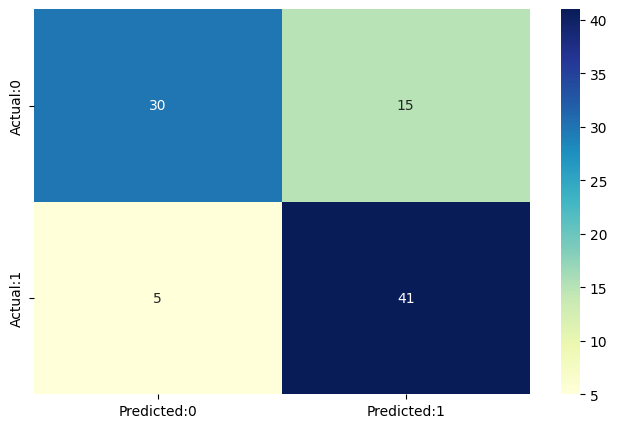

In [504]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression(max_iter=200)
model_logistic.fit(X_train,y_train)

y_pred_logis = model_logistic.predict(X_test)
print(accuracy_score(y_test, y_pred_logis))
logistic_acc = accuracy_score(y_test, y_pred_logis)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_logis)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_logis))

y_pred_test = model_logistic.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=200, max_iter=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Info] Number of positive: 119, number of negative: 93
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.561321 -> initscore=0.246524
[LightGBM] [Info] Start training from score 0.246524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Actual,Y test predicted
90,1,1
173,0,0
172,0,1
94,1,1
114,1,1
70,1,1
276,0,0
111,1,1
125,1,1
160,1,1


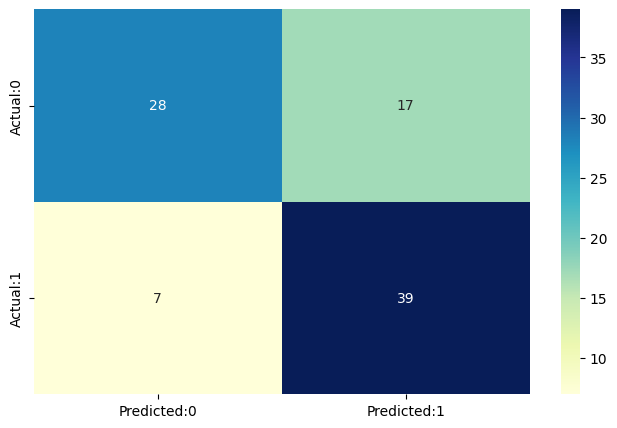

In [505]:
#LightGBM
import lightgbm as lgb
model_gbm= lgb.LGBMClassifier(max_iter=200)
model_gbm.fit(X_train,y_train)

y_pred_gbm = model_gbm.predict(X_test)
print(accuracy_score(y_test, y_pred_gbm))
gbm_accu = accuracy_score(y_test, y_pred_gbm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbm))

y_pred_test = model_gbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7582417582417582
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        45
           1       0.72      0.85      0.78        46

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



,Actual,Y test predicted
223,0,0
295,0,0
132,1,1
114,1,1
113,1,0
139,1,0
176,0,0
249,0,0
108,1,1
279,0,0


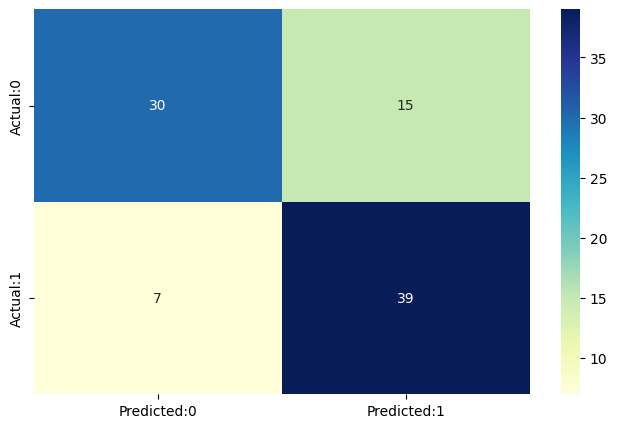

In [506]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier()
model_gbc.fit(X_train,y_train)

y_pred_gbc = model_gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))
gbc_accu = accuracy_score(y_test, y_pred_gbc)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_gbc)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_gbc))

y_pred_test = model_gbc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        45
           1       0.69      0.80      0.74        46

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



,Actual,Y test predicted
3,1,1
99,1,1
65,1,1
273,0,1
36,1,1
279,0,0
298,0,1
101,1,0
295,0,0
272,0,1


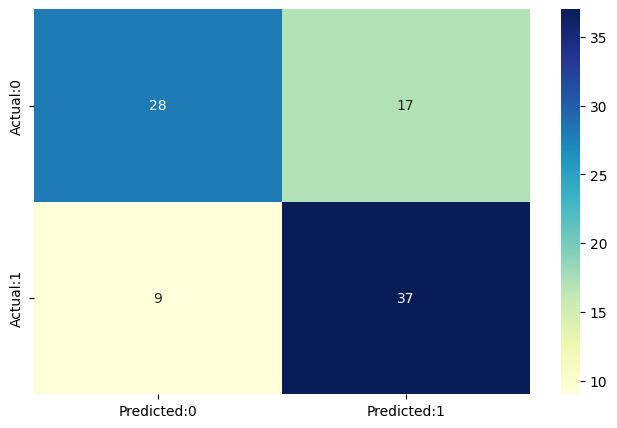

In [507]:
#XGBoost
from xgboost import XGBClassifier
model_xg= XGBClassifier()
model_xg.fit(X_train,y_train)

y_pred_xg = model_xg.predict(X_test)
print(accuracy_score(y_test, y_pred_xg))
xg_accu = accuracy_score(y_test, y_pred_xg)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_xg)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_xg))

y_pred_test = model_xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7582417582417582
              precision    recall  f1-score   support

           0       0.83      0.64      0.73        45
           1       0.71      0.87      0.78        46

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.75        91
weighted avg       0.77      0.76      0.75        91



,Actual,Y test predicted
62,1,1
139,1,0
255,0,0
264,0,0
18,1,1
37,1,1
253,0,0
101,1,0
207,0,0
156,1,1


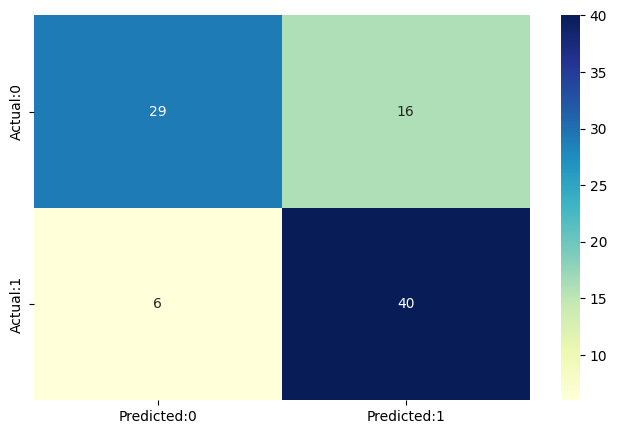

In [508]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_Random= RandomForestClassifier()
model_Random.fit(X_train,y_train)

y_pred_Random= model_Random.predict(X_test)
print(accuracy_score(y_test, y_pred_Random))
rf_accu = accuracy_score(y_test, y_pred_Random)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_Random)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_Random))

y_pred_test = model_Random.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.6923076923076923
              precision    recall  f1-score   support

           0       0.76      0.56      0.64        45
           1       0.66      0.83      0.73        46

    accuracy                           0.69        91
   macro avg       0.71      0.69      0.69        91
weighted avg       0.71      0.69      0.69        91



,Actual,Y test predicted
243,0,0
61,1,1
69,1,1
50,1,1
225,0,1
254,0,1
172,0,1
62,1,1
101,1,0
99,1,1


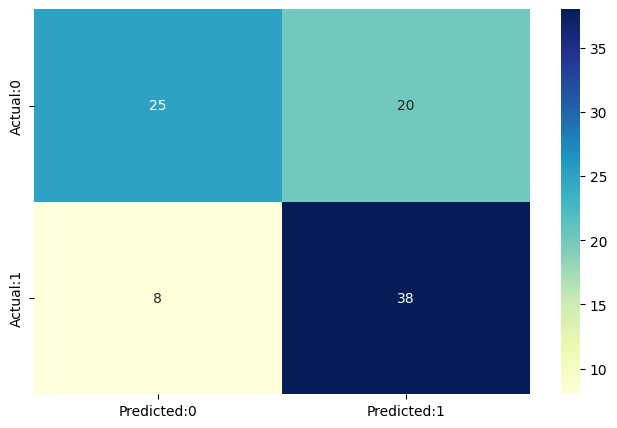

In [509]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

y_pred_tree= model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))
tree_accu = accuracy_score(y_test, y_pred_tree)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_tree)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_tree))

y_pred_test = model_tree.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7802197802197802
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.73      0.89      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



,Actual,Y test predicted
102,1,1
254,0,1
182,0,1
187,0,0
290,0,1
245,0,1
36,1,1
295,0,0
188,0,1
14,1,1


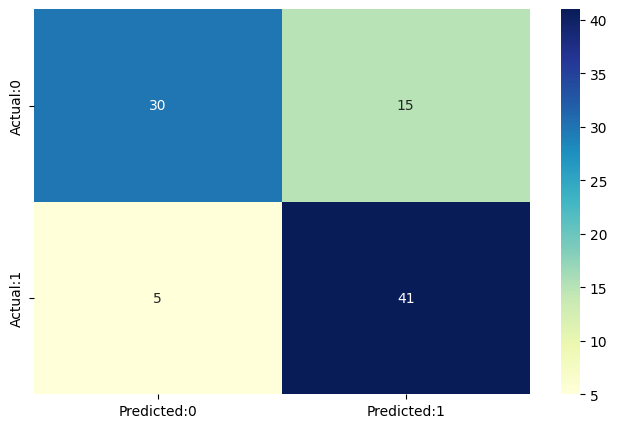

In [510]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier()
model_knn.fit(X_train,y_train)

y_pred_knn= model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
knn_accu = accuracy_score(y_test, y_pred_knn)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_knn)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_knn))

y_pred_test = model_knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

0.7582417582417582
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        45
           1       0.71      0.89      0.79        46

    accuracy                           0.76        91
   macro avg       0.78      0.76      0.75        91
weighted avg       0.78      0.76      0.75        91



,Actual,Y test predicted
255,0,0
176,0,0
86,1,1
94,1,1
132,1,1
261,0,1
173,0,0
80,1,1
168,0,0
3,1,1


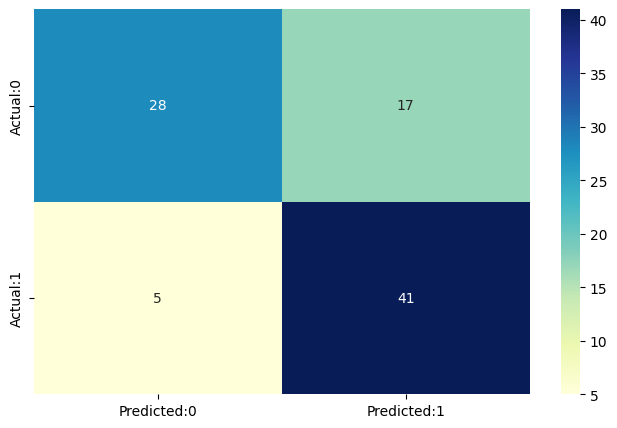

In [511]:
#SVM
from sklearn.svm import SVC
model_svm= SVC()
model_svm.fit(X_train,y_train)

y_pred_svm= model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))
svm_accu = accuracy_score(y_test, y_pred_svm)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_svm)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred_svm))

y_pred_test = model_svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

test.sample(10)

In [512]:
accuracy


{}

Text(0, 0.5, 'Accuracy')

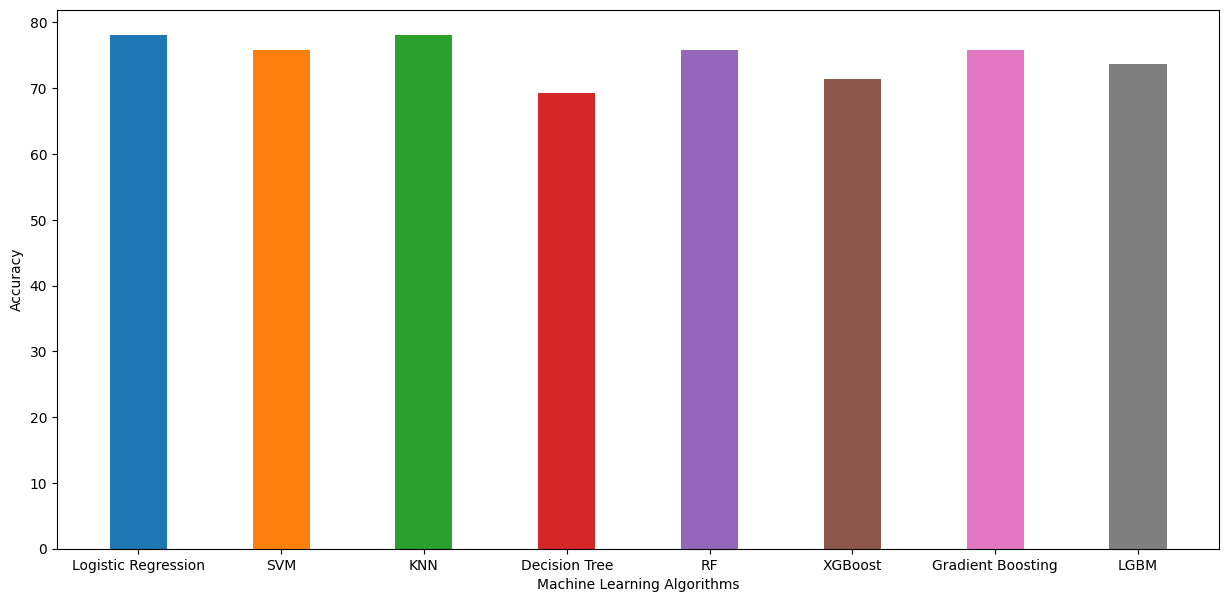

In [513]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')

In [514]:
from imblearn.over_sampling import SMOTE


In [515]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

print(y1.value_counts())


1    165
0    165
Name: target, dtype: int64


In [516]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = 'True',random_state = 3)

In [517]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(231, 13)
(99, 13)
(231,)
(99,)


0.8787878787878788
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        46
           1       0.86      0.92      0.89        53

    accuracy                           0.88        99
   macro avg       0.88      0.88      0.88        99
weighted avg       0.88      0.88      0.88        99



,Actual,Y test predicted
118,1,1
198,0,0
299,0,1
15,1,1
84,1,1


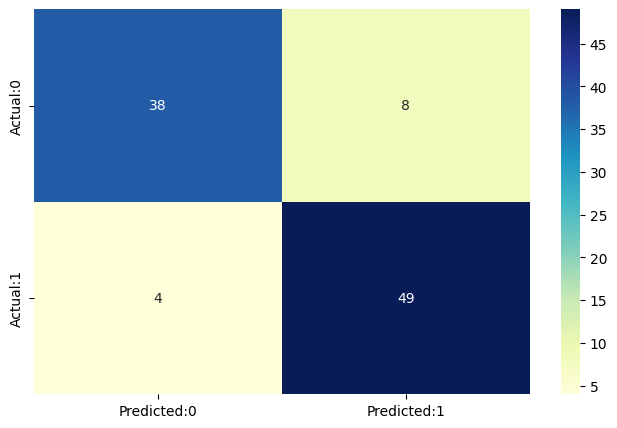

In [518]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
logis_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8787878787878788
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        46
           1       0.84      0.96      0.89        53

    accuracy                           0.88        99
   macro avg       0.89      0.87      0.88        99
weighted avg       0.89      0.88      0.88        99



,Actual,Y test predicted
118,1,1
198,0,0
299,0,0
15,1,1
84,1,1


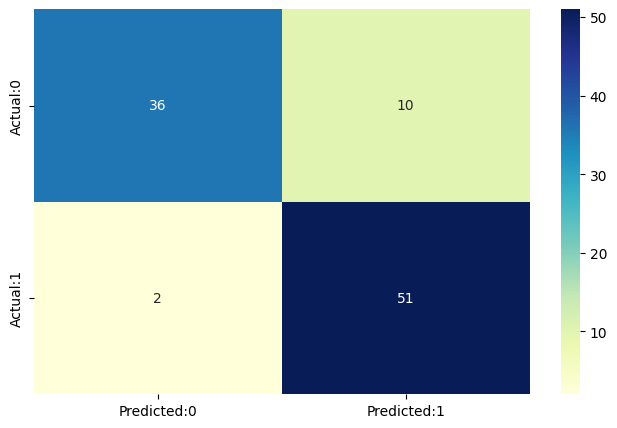

In [519]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
svm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = svm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8888888888888888
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        46
           1       0.90      0.89      0.90        53

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



,Actual,Y test predicted
118,1,1
198,0,0
299,0,0
15,1,1
84,1,1


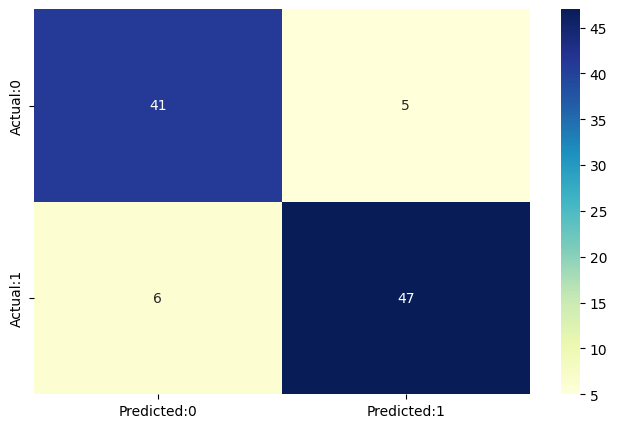

In [520]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred1))
knn_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = knn.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.797979797979798
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        46
           1       0.80      0.83      0.81        53

    accuracy                           0.80        99
   macro avg       0.80      0.80      0.80        99
weighted avg       0.80      0.80      0.80        99



,Actual,Y test predicted
118,1,0
198,0,0
299,0,1
15,1,1
84,1,1


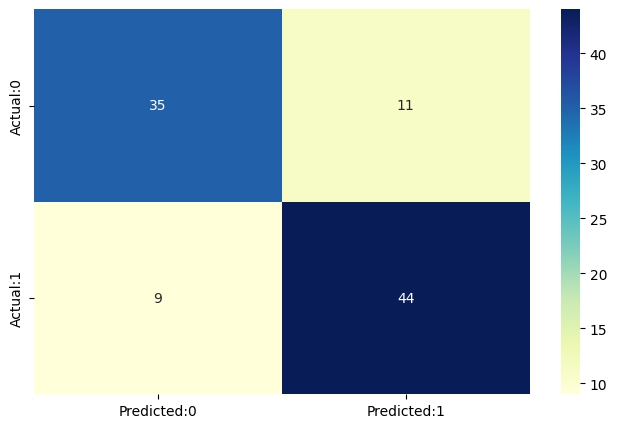

In [521]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)
print(accuracy_score(y_test, y_pred1))
dt_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = dt.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.797979797979798
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        46
           1       0.79      0.85      0.82        53

    accuracy                           0.80        99
   macro avg       0.80      0.79      0.80        99
weighted avg       0.80      0.80      0.80        99



,Actual,Y test predicted
118,1,1
198,0,0
299,0,1
15,1,1
84,1,1


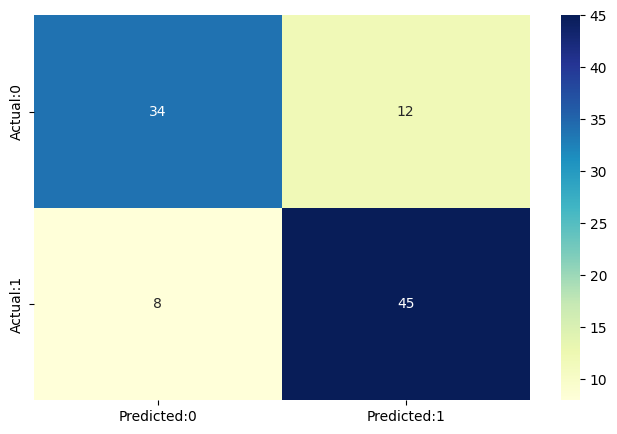

In [522]:
rf= DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred1))
rf_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = rf.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8282828282828283
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        46
           1       0.81      0.89      0.85        53

    accuracy                           0.83        99
   macro avg       0.83      0.82      0.83        99
weighted avg       0.83      0.83      0.83        99



,Actual,Y test predicted
118,1,1
198,0,0
299,0,0
15,1,1
84,1,1


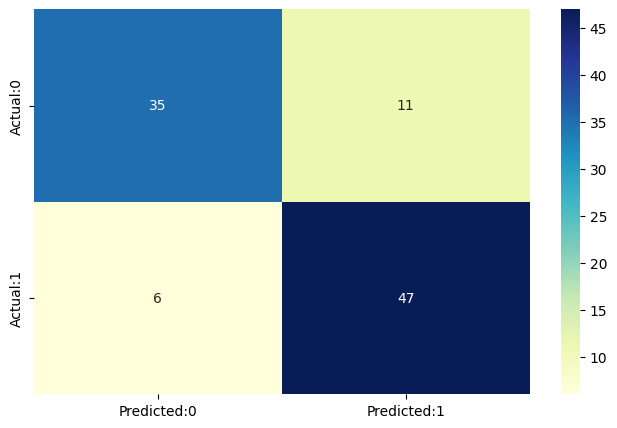

In [523]:
xg= XGBClassifier()
xg.fit(X_train, y_train)
y_pred1 = xg.predict(X_test)
print(accuracy_score(y_test, y_pred1))
xg_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = xg.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

0.8181818181818182
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        46
           1       0.80      0.89      0.84        53

    accuracy                           0.82        99
   macro avg       0.82      0.81      0.81        99
weighted avg       0.82      0.82      0.82        99



,Actual,Y test predicted
118,1,1
198,0,0
299,0,0
15,1,1
84,1,1


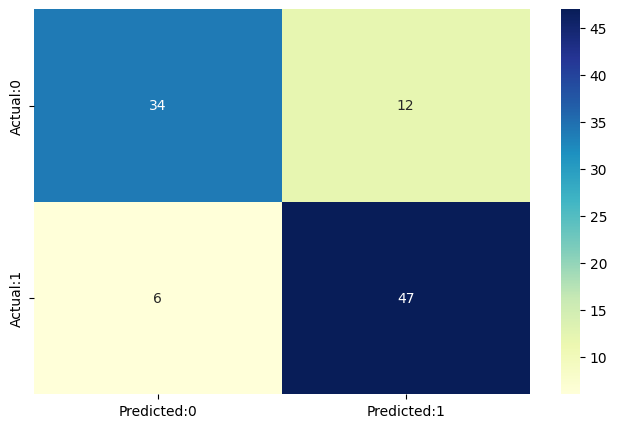

In [524]:
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred1 = gb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
gb_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = gb.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

[LightGBM] [Info] Number of positive: 112, number of negative: 119
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484848 -> initscore=-0.060625
[LightGBM] [Info] Start training from score -0.060625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,Actual,Y test predicted
118,1,1
198,0,0
299,0,1
15,1,1
84,1,1


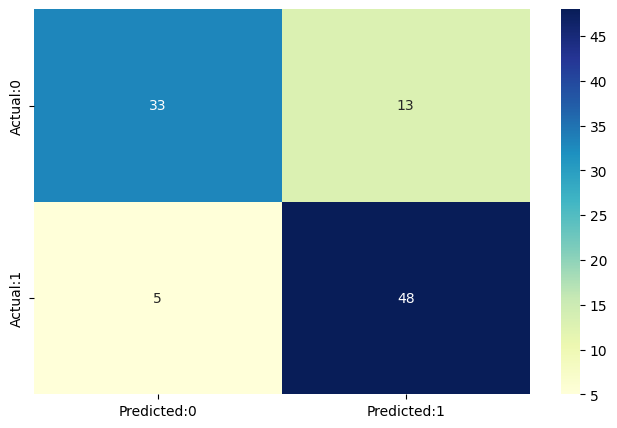

In [525]:
lgbm= lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred1 = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred1))
lgbm_acc1 = accuracy_score(y_test, y_pred1)*100

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(classification_report(y_test,y_pred1))

y_pred_test = lgbm.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})
test.head()

Text(0, 0.5, 'Accuracy')

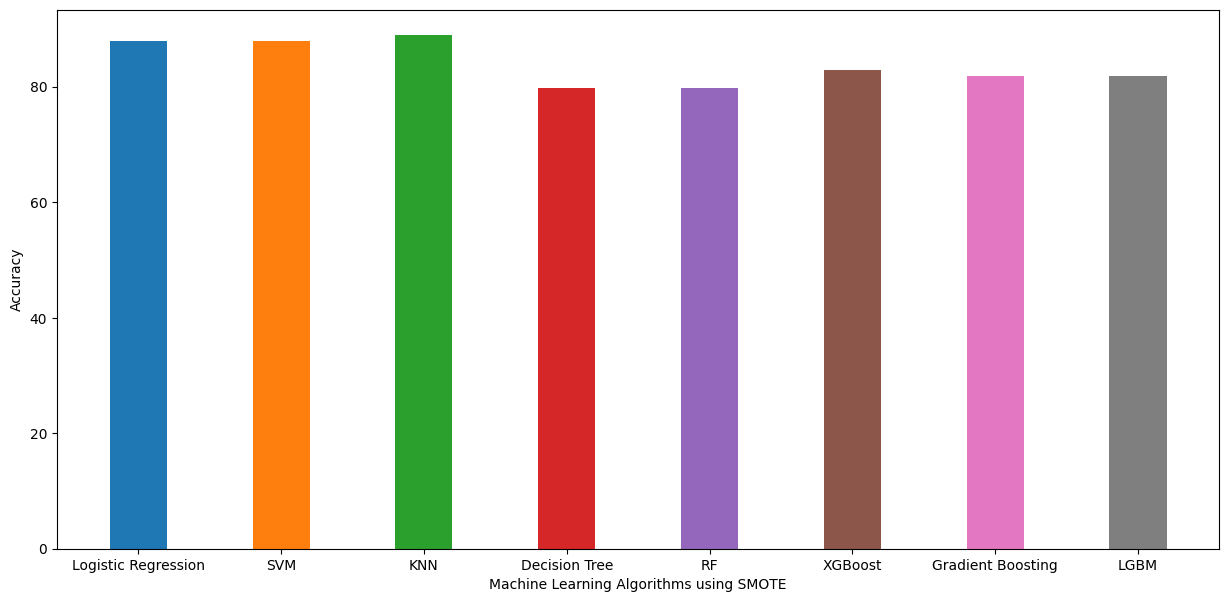

In [526]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

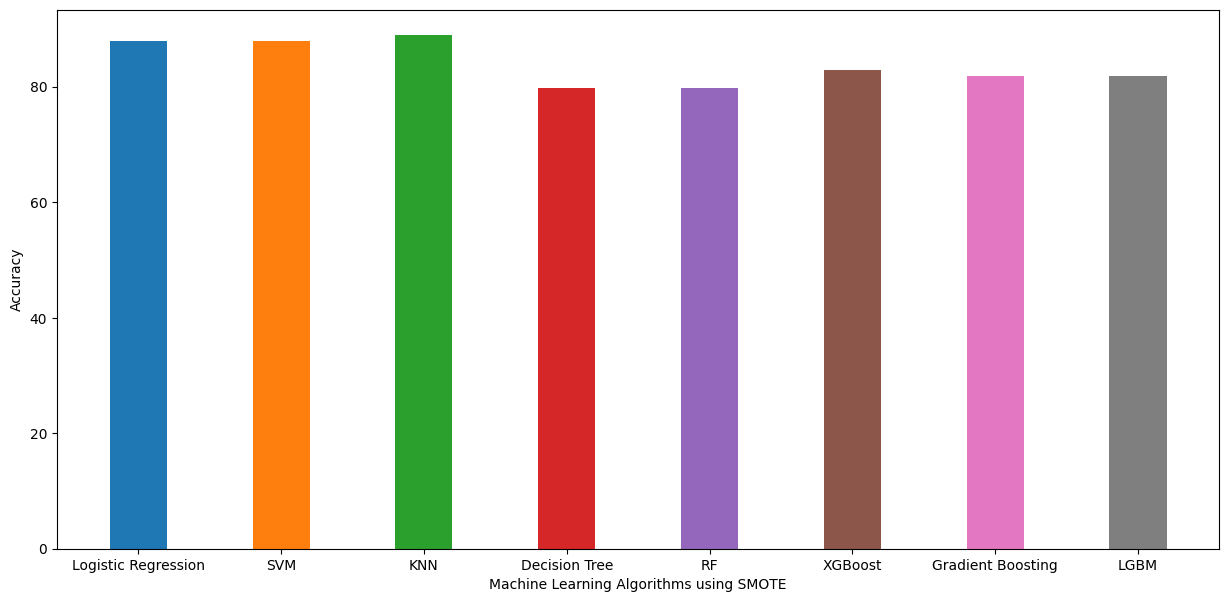

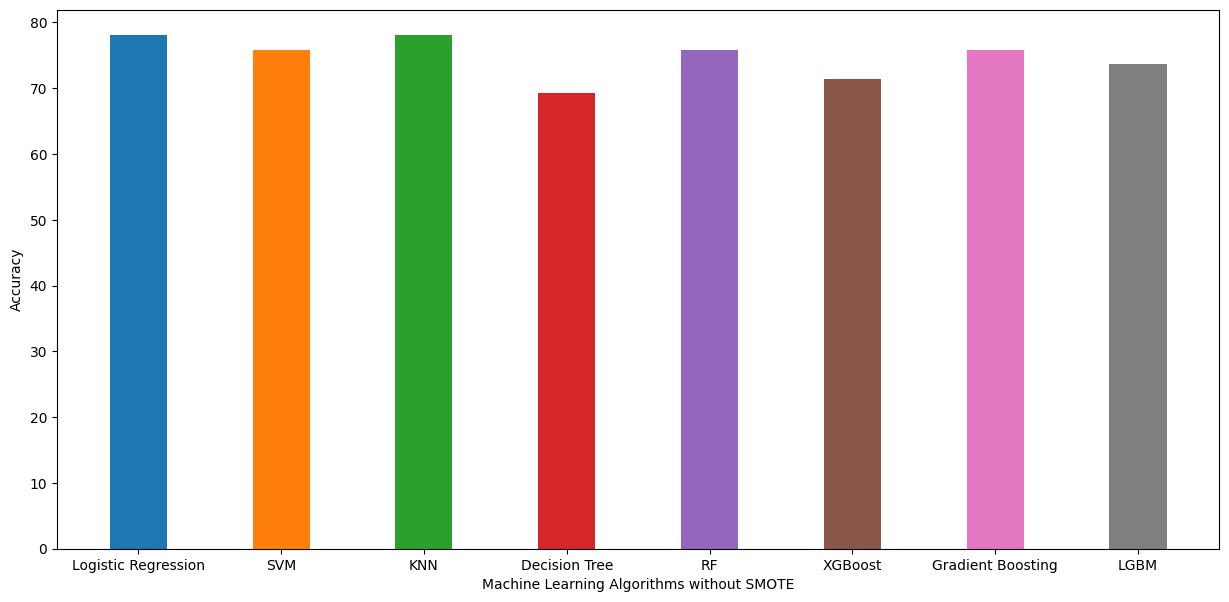

In [527]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logis_acc1 , width=0.4)
plt.bar("SVM", svm_acc1, width=0.4)
plt.bar("KNN",knn_acc1,width=0.4)
plt.bar("Decision Tree", dt_acc1 ,width=0.4)
plt.bar("RF", rf_acc1,width=0.4)
plt.bar("XGBoost", xg_acc1,width=0.4)
plt.bar("Gradient Boosting", gb_acc1,width=0.4)
plt.bar("LGBM",lgbm_acc1,width=0.4)
plt.xlabel('Machine Learning Algorithms using SMOTE')
plt.ylabel('Accuracy')


plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.4)
plt.bar("SVM", svm_accu, width=0.4)
plt.bar("KNN",knn_accu,width=0.4)
plt.bar("Decision Tree", tree_accu,width=0.4)
plt.bar("RF", rf_accu,width=0.4)
plt.bar("XGBoost", xg_accu,width=0.4)
plt.bar("Gradient Boosting", gbc_accu,width=0.4)
plt.bar("LGBM",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms without SMOTE')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

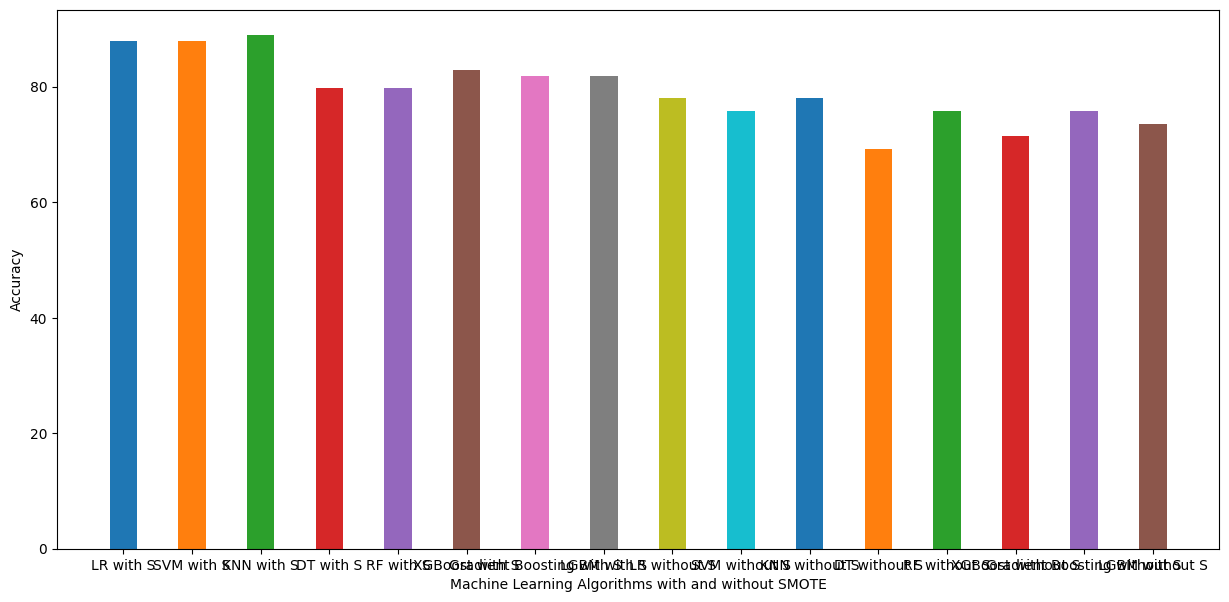

In [528]:
plt.figure(figsize=(15,7))
plt.bar("LR with S", logis_acc1 , width=0.4)
plt.bar("SVM with S", svm_acc1, width=0.4)
plt.bar("KNN with S",knn_acc1,width=0.4)
plt.bar("DT with S", dt_acc1 ,width=0.4)
plt.bar("RF with S", rf_acc1,width=0.4)
plt.bar("XGBoost with S", xg_acc1,width=0.4)
plt.bar("Gradient Boosting with S", gb_acc1,width=0.4)
plt.bar("LGBM with S",lgbm_acc1,width=0.4)
plt.bar("LR without S", logistic_acc, width=0.4)
plt.bar("SVM without S", svm_accu, width=0.4)
plt.bar("KNN without S",knn_accu,width=0.4)
plt.bar("DT without S", tree_accu,width=0.4)
plt.bar("RF without S", rf_accu,width=0.4)
plt.bar("XGBoost without S", xg_accu,width=0.4)
plt.bar("Gradient Boosting without S", gbc_accu,width=0.4)
plt.bar("LGBM without S",gbm_accu,width=0.4)
plt.xlabel('Machine Learning Algorithms with and without SMOTE')
plt.ylabel('Accuracy')